<div style="padding: 40px; border-radius: 10px; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">🚢 TITANIC DEATH PREDICTION NOTEBOOK </h1>
    <p style="font-size: 24px; font-weight: bold; margin-top: 20px;"></p>
    <img src="./src/titanic.gif" alt="GIF" style="width: 400px; margin: 20px auto;">
</div>


## <div style="border-radius:0px; border:blue solid; padding: 15px; ont-size:100%; text-align:center">1. Import Libraries</div>

In [1]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'


import warnings
warnings.filterwarnings("ignore")

## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">2. Read and Explain Dataset</div>

In [2]:
data_final =  pd.read_csv("./datasets/test.csv") 

data_original =  pd.read_csv("./datasets/train.csv") 
data = pd.read_csv("./datasets/train.csv") 


data.sample(6).reset_index(drop=True).style.set_properties(**{'border-color': 'blue'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,471,0,3,"Keefe, Mr. Arthur",male,nan,0,0,323592,7.250000,nan,S
1,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.000000,0,0,350042,7.795800,nan,S
2,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)",female,24.000000,2,1,243847,27.000000,nan,S
3,245,0,3,"Attalah, Mr. Sleiman",male,30.000000,0,0,2694,7.225000,nan,C
4,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.000000,4,2,347082,31.275000,nan,S
5,615,0,3,"Brocklebank, Mr. William Alfred",male,35.000000,0,0,364512,8.050000,nan,S



| Variable  | Definition                                | Key                                           |
|-----------|------------------------------------------|-----------------------------------------------|
| survival  | Survival                                 | 0 = No, 1 = Yes                               |
| pclass    | Ticket class                            | 1 = 1st, 2 = 2nd, 3 = 3rd                     |
| sex       | Sex                                      |                                               |
| Age       | Age in years                            |                                               |
| sibsp     | # of siblings / spouses aboard          |                                               |
| parch     | # of parents / children aboard          |                                               |
| ticket    | Ticket number                           |                                               |
| fare      | Passenger fare                          |                                               |
| cabin     | Cabin number                            |                                               |
| embarked  | Port of Embarkation                     | C = Cherbourg, Q = Queenstown, S = Southampton|

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle  
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way:
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way:
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.
"""



## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">3. Exploratory Data Analysis</div>

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
data['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
data.select_dtypes(exclude=['object']).corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


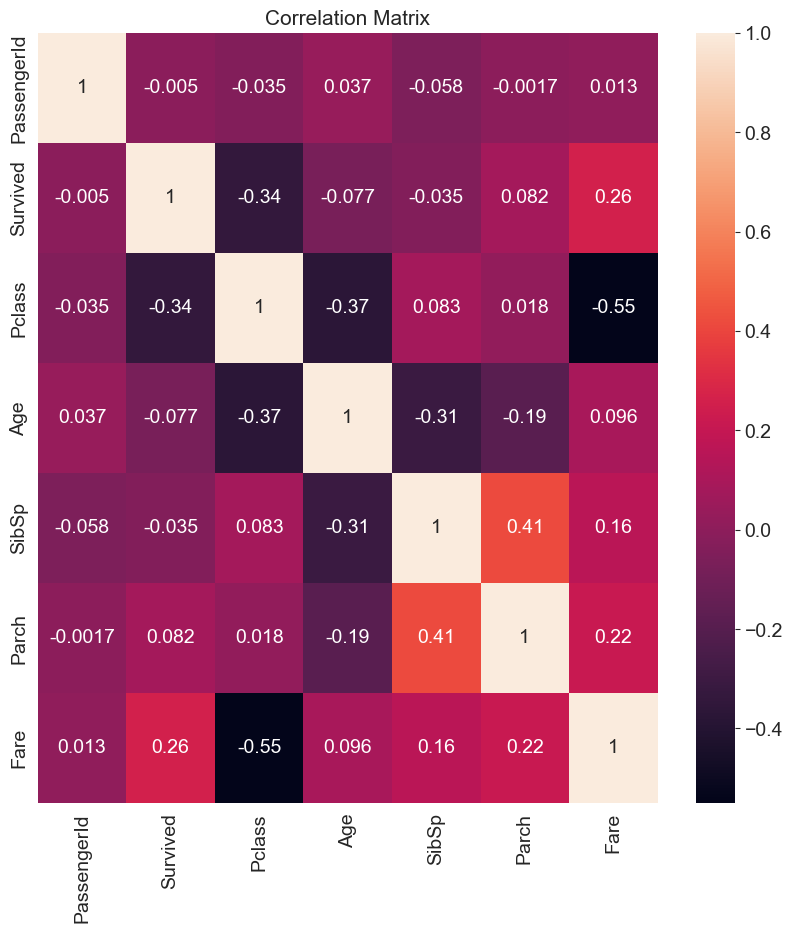

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.select_dtypes(exclude=['object']).corr(),annot=True,ax=ax)
plt.title('Correlation Matrix',fontsize=15)
plt.show()



# Univariate Analysis


In [13]:
max_age = max(data['Age'])
min_age = min(data['Age'])

print(f'Max Age: {max_age}')
print(f'Min Age: {min_age}')

def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['Age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([0 ,4, 12, 19, 59, 80])



Max Age: 80.0
Min Age: 0.42
Age between 1 and 4: Number of people 33
Age between 5 and 12: Number of people 29
Age between 13 and 19: Number of people 95
Age between 20 and 59: Number of people 524
Age between 60 and 80: Number of people 26


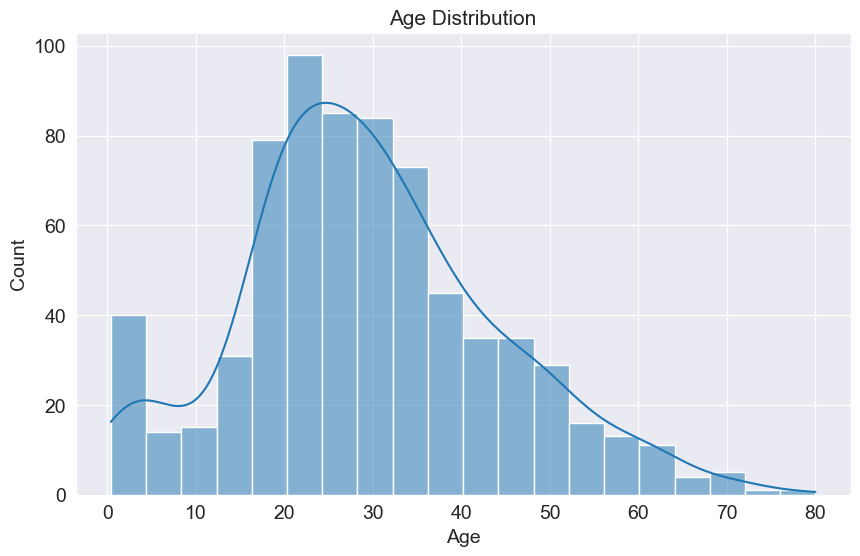

In [14]:
def plot_age_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Age'],kde=True)
    plt.title('Age Distribution',fontsize=15)
    plt.show()

plot_age_distribution(data)

In [15]:
max_fare = max(data['Fare'])
min_fare = min(data['Fare'])

print(f'Max Fare: {max_fare}')
print(f'Min Fare: {min_fare}')
print(data.Fare.value_counts)

def fare_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['Fare'].between(next,arr[i+1]).sum()
        print(f'Fare between {next} and {arr[i+1]}: Number of people {num_people}')
        
fare_group([0 ,50, 100, float('inf')])




Max Fare: 512.3292
Min Fare: 0.0
<bound method IndexOpsMixin.value_counts of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>
Fare between 1 and 50: Number of people 716
Fare between 51 and 100: Number of people 106
Fare between 101 and inf: Number of people 53


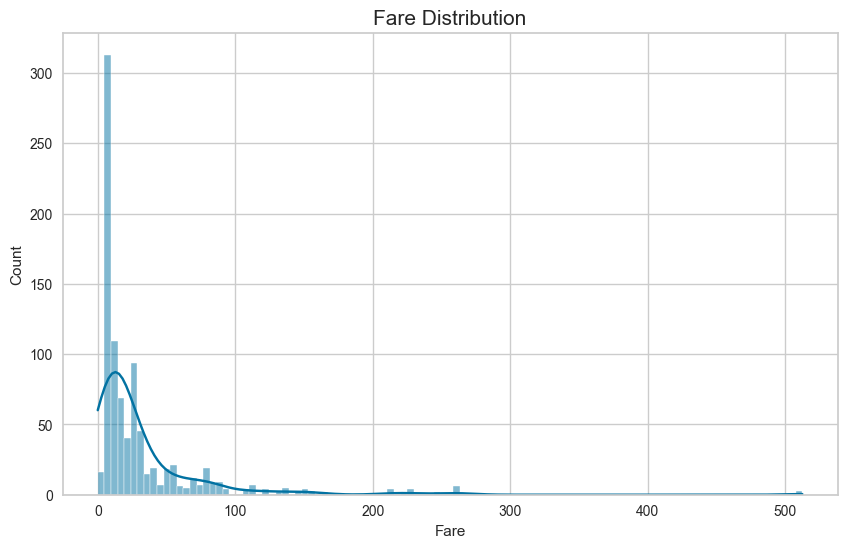

In [84]:
def plot_fare_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['Fare'],kde=True)
    plt.title('Fare Distribution',fontsize=15)
    plt.show()

plot_fare_distribution(data)

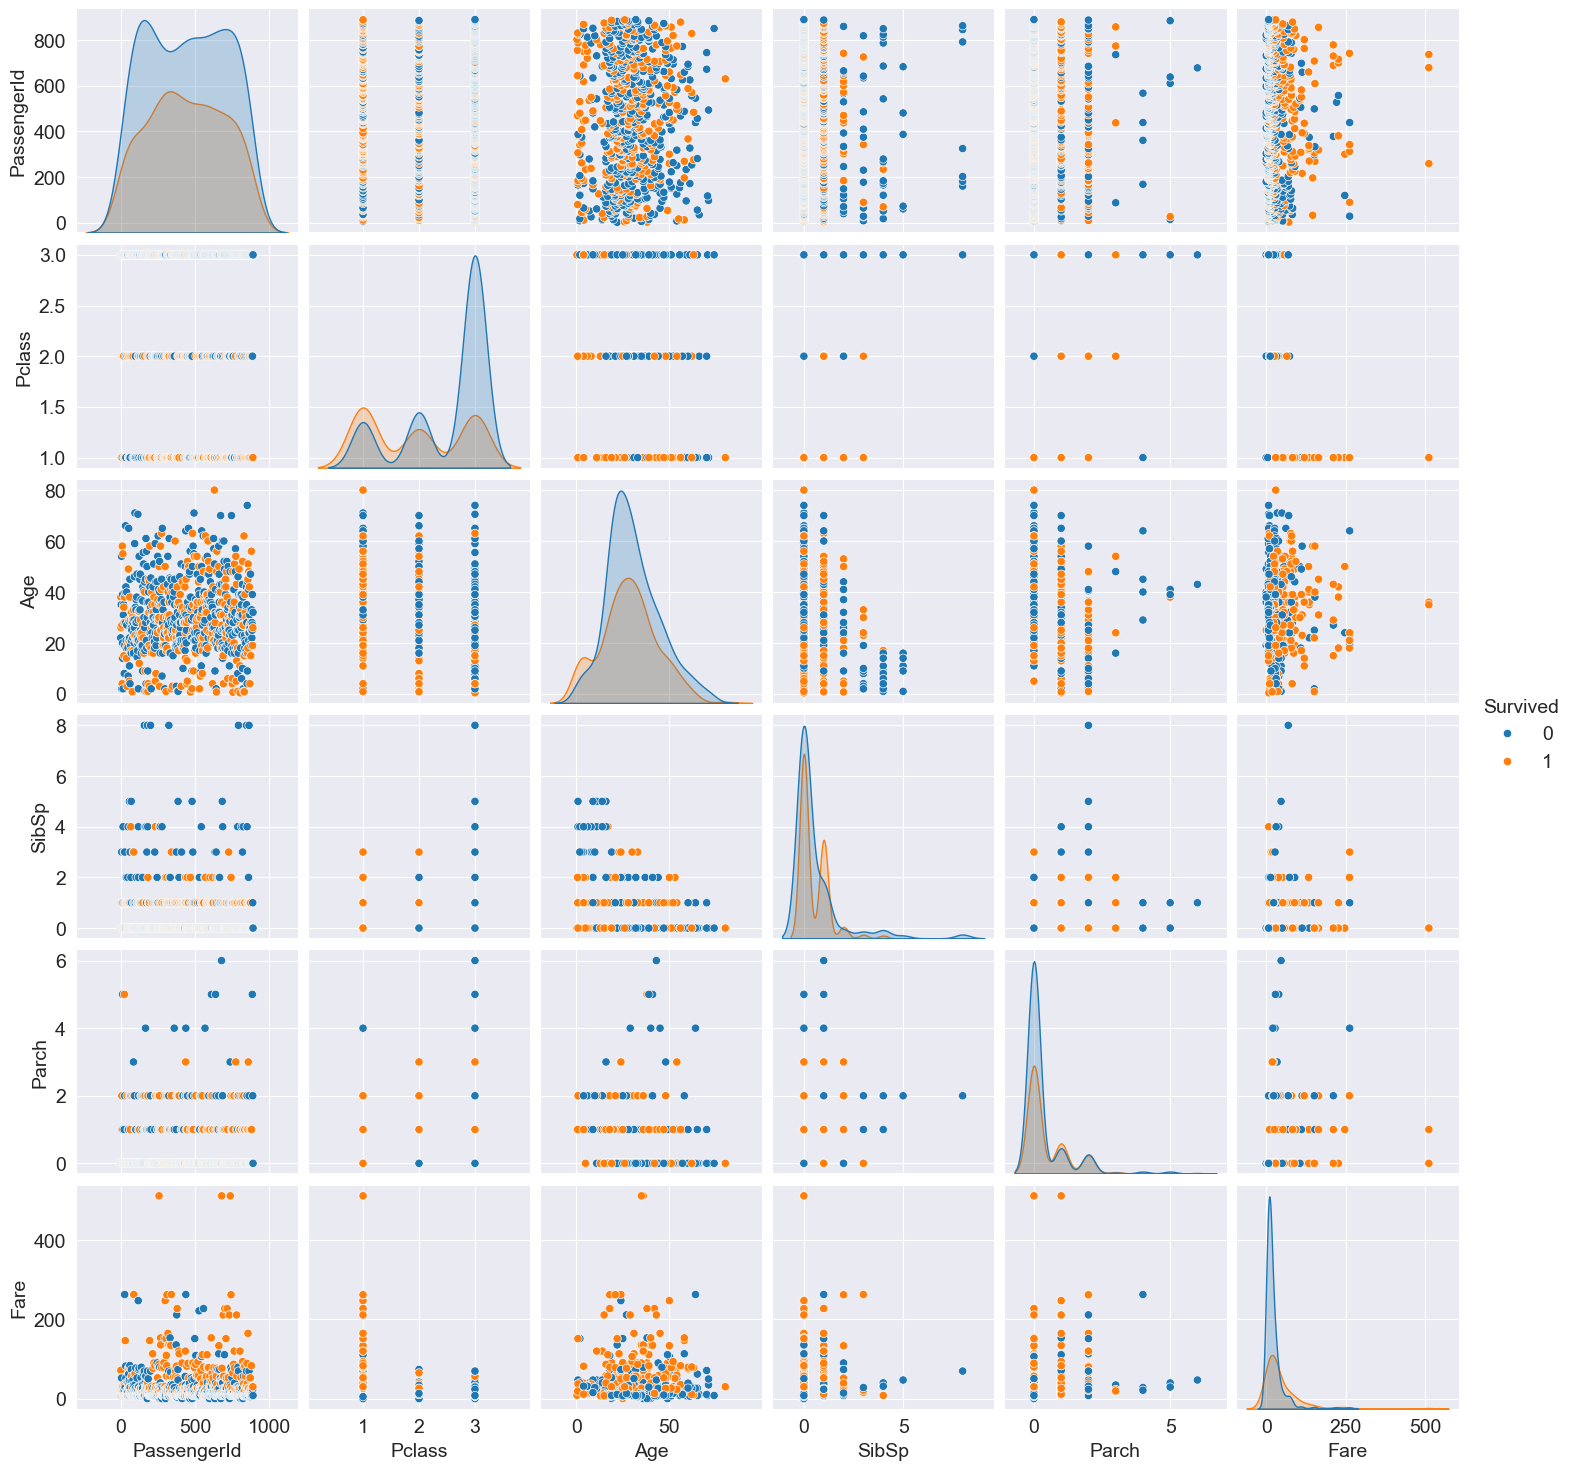

In [16]:
sns.pairplot(data,hue='Survived')

In [17]:
data['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

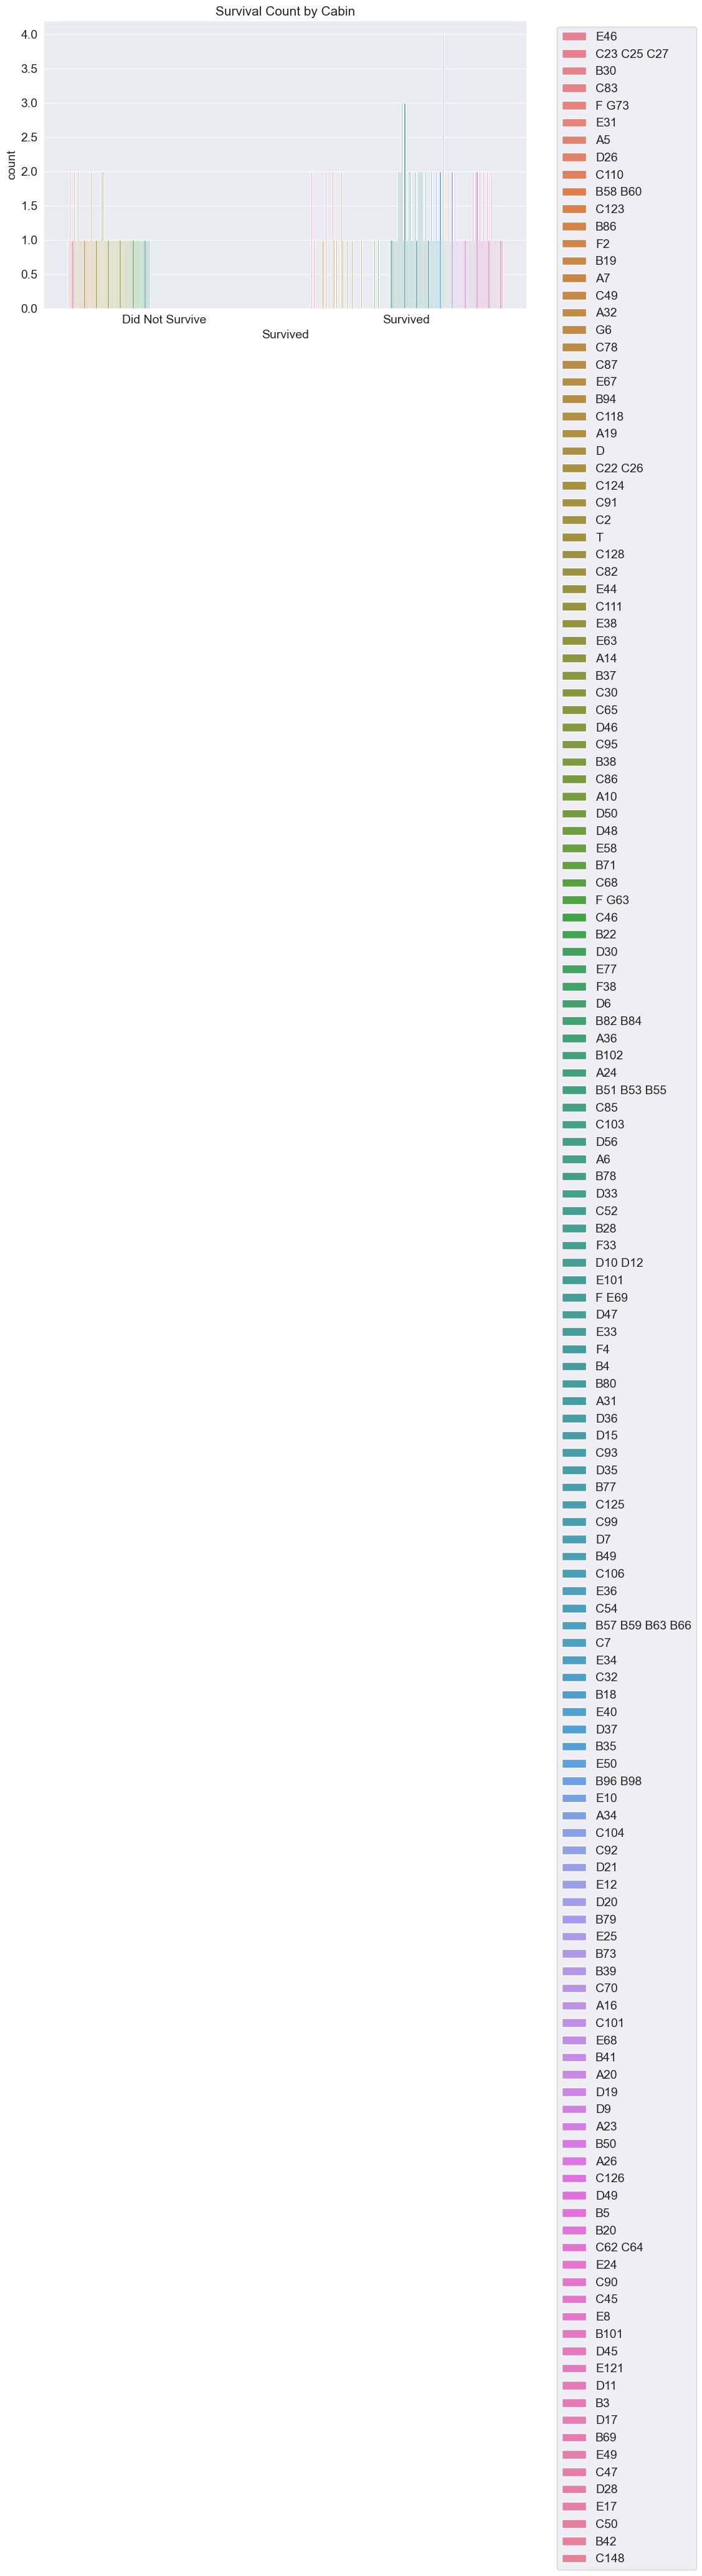

In [18]:
cabin_data = data[data['Cabin'].notna()]

plt.figure(figsize=(10,6))
sns.countplot(data=cabin_data, x='Survived', hue='Cabin')
plt.title('Survival Count by Cabin', fontsize=15)
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">4. Dealing with Outliers</div>

In [19]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data = data.dropna(subset=['Embarked'])

In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
data['Survived'].value_counts()


Survived
0    549
1    340
Name: count, dtype: int64

In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<BarContainer object of 88 artists>

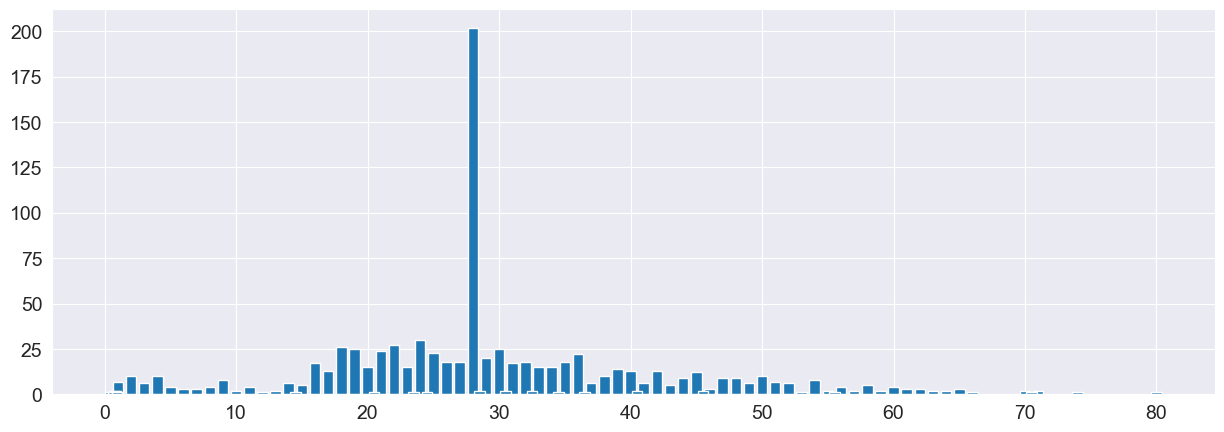

In [24]:
vertical = data['Age'].value_counts().values
horizontal = data['Age'].value_counts().index

fig = plt.figure(figsize=(15,5))
plt.bar(horizontal, vertical)


## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">5. Feature Engineering</div>

In [25]:
# data['Age'] = pd.cut(data['Age'],
#                      bins=[0 ,4, 12, 19, 59, 80],
#                      labels=["Baby", "Kid", "Teen", "Adult", "Senior"])

In [26]:
# data['Age'].dtype

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data['family_size'] = data['SibSp'] + data['Parch'] + 1

In [29]:
data.family_size.value_counts()

family_size
1     535
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [30]:
data["fare_per_person"] = data['Fare'] / data['family_size']

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000


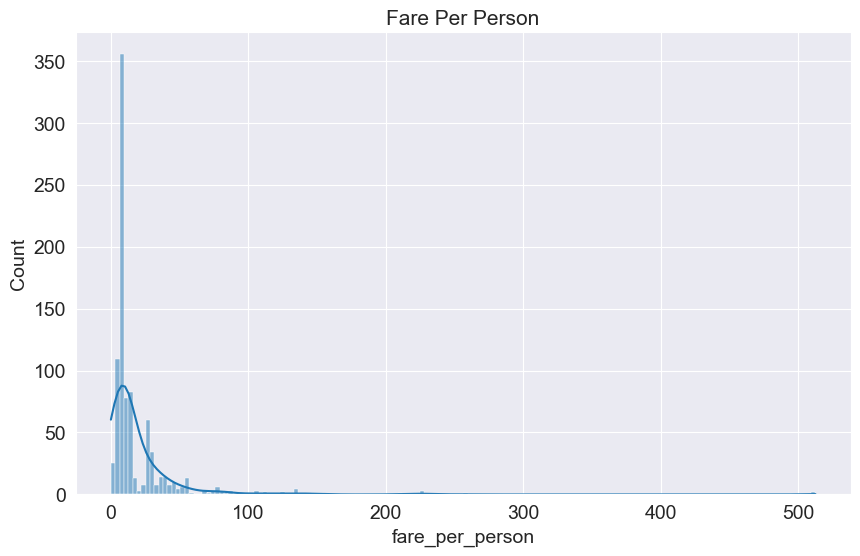

In [32]:
def plot_age_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data['fare_per_person'],kde=True)
    plt.title('Fare Per Person',fontsize=15)
    plt.show()

plot_age_distribution(data)

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000


In [34]:
ticket_group_size = data.groupby('Ticket').size()

data['ticket_group_size'] = data['Ticket'].map(ticket_group_size)

In [35]:
data['is_alone'] = (data['family_size'] == 1).astype(int)

In [36]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,fare_per_person,ticket_group_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,1,1


In [37]:
data.family_size.value_counts()

family_size
1     535
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [38]:
data['family_size'] = pd.cut(data['family_size'],
                     bins=[0, 1, 3, 5, float('inf')],
                     labels=['Al', 'Sm', 'Me', 'La'])

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,fare_per_person,ticket_group_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Sm,3.62500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Sm,35.64165,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Al,7.92500,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Sm,26.55000,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Al,8.05000,1,1


In [40]:
data.ticket_group_size.value_counts()

ticket_group_size
1    547
2    186
3     63
4     44
7     21
6     18
5     10
Name: count, dtype: int64

In [41]:
data['ticket_group_size'] = pd.cut(data['ticket_group_size'],
                     bins=[0, 1, 3, 5, float('inf')],
                     labels=['Solo', 'Small', 'Medium', 'Large'])

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,fare_per_person,ticket_group_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Sm,3.62500,Solo,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Sm,35.64165,Solo,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Al,7.92500,Solo,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Sm,26.55000,Small,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Al,8.05000,Solo,1


In [43]:
data['Pclass'] = data['Pclass'].replace({3: 'Poor', 2: 'Middle', 1: 'Rich'})



In [44]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_size',
       'fare_per_person', 'ticket_group_size', 'is_alone'],
      dtype='object')

In [45]:
raw_data = data.copy()

In [46]:
col_list = ['Survived',
             'Pclass',
             'Sex',
             'Age',
             'SibSp',
             'Parch',
             'Embarked',
             'family_size',
             'fare_per_person',
             'ticket_group_size',
             'is_alone']
drop_cols = ['Name', 'Ticket', 'Cabin', "PassengerId","SibSp", "Parch", "Embarked"]
scale_col = ["Fare", "fare_per_person", "Age"]
normal_col = ["Fare", "fare_per_person", "Age"]
ohe_cols = ["Sex", "Pclass", "family_size", "ticket_group_size"]

In [47]:
data = data.drop(drop_cols, axis=1)

## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">6. Data Preprocessing</div>

In [48]:
X = data.drop(['Survived'], axis=1)
Y = data['Survived']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [50]:
x_train.shape

(711, 8)

In [51]:
x_test.shape

(178, 8)

In [52]:
x_train.reset_index(inplace=True)
x_test.reset_index(inplace=True)

In [53]:
x_train.columns

Index(['index', 'Pclass', 'Sex', 'Age', 'Fare', 'family_size',
       'fare_per_person', 'ticket_group_size', 'is_alone'],
      dtype='object')

In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_cols])

OneHotEncoder()

In [55]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['Middle', 'Poor', 'Rich'], dtype=object),
 array(['Al', 'La', 'Me', 'Sm'], dtype=object),
 array(['Large', 'Medium', 'Small', 'Solo'], dtype=object)]

In [56]:
merge_ohe = np.concatenate((ohe.categories_[0], 
                            ohe.categories_[1], 
                            ohe.categories_[2], 
                            ohe.categories_[3],
                            ))

In [57]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_cols]).toarray(),columns=merge_ohe)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_cols]).toarray(),columns=merge_ohe)

In [58]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_cols, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_cols, axis=1)

In [59]:
X_new.head()

,female,male,Middle,Poor,Rich,Al,La,Me,Sm,Large,Medium,Small,Solo,index,Age,Fare,fare_per_person,is_alone
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,708,22.0,151.5500,151.550000,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,240,28.0,14.4542,7.227100,0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,382,32.0,7.9250,7.925000,1
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,792,28.0,69.5500,6.322727,0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,683,14.0,46.9000,5.862500,0


In [60]:
X_new_test.head()

,female,male,Middle,Poor,Rich,Al,La,Me,Sm,Large,Medium,Small,Solo,index,Age,Fare,fare_per_person,is_alone
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,281,28.0,7.8542,7.85420,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,435,14.0,120.0000,30.00000,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,39,14.0,11.2417,5.62085,0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,418,30.0,13.0000,13.00000,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,585,18.0,79.6500,26.55000,0


In [61]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_new.loc[:,normal_col] = scaler.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler.transform(X_new_test.loc[:,normal_col])


In [62]:
x_train.reset_index(inplace=True)
x_test.reset_index(inplace=True)

In [63]:
X_new_test.drop('index', axis=1).columns
X_new.drop('index', axis=1).columns

Index(['female', 'male', 'Middle', 'Poor', 'Rich', 'Al', 'La', 'Me', 'Sm',
       'Large', 'Medium', 'Small', 'Solo', 'Age', 'Fare', 'fare_per_person',
       'is_alone'],
      dtype='object')

## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">7. Machine Learning</div>

In [64]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import mean_squared_error 
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

In [65]:
svc = SVC()
knc = KNeighborsClassifier() 
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = LGBMClassifier() 



In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity

In [68]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []


for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print(name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)

SVC
Accuracy -  0.6123595505617978
Precision -  0.0
Recall -  0.0
Specificity -  1.0

KN
Accuracy -  0.6460674157303371
Precision -  0.5625
Recall -  0.391304347826087
Specificity -  0.8073394495412844

DT
Accuracy -  0.7191011235955056
Precision -  0.6144578313253012
Recall -  0.7391304347826086
Specificity -  0.7064220183486238

LR
Accuracy -  0.8258426966292135
Precision -  0.7638888888888888
Recall -  0.7971014492753623
Specificity -  0.8440366972477065

RF
Accuracy -  0.7921348314606742
Precision -  0.7285714285714285
Recall -  0.7391304347826086
Specificity -  0.8256880733944955

AdaBoost
Accuracy -  0.7865168539325843
Precision -  0.691358024691358
Recall -  0.8115942028985508
Specificity -  0.7706422018348624

BgC
Accuracy -  0.7696629213483146
Precision -  0.7058823529411765
Recall -  0.6956521739130435
Specificity -  0.8165137614678899

ETC
Accuracy -  0.8089887640449438
Precision -  0.7397260273972602
Recall -  0.782608695652174
Specificity -  0.8256880733944955

GBDT
Accura

In [69]:
X_new.columns

Index(['female', 'male', 'Middle', 'Poor', 'Rich', 'Al', 'La', 'Me', 'Sm',
       'Large', 'Medium', 'Small', 'Solo', 'index', 'Age', 'Fare',
       'fare_per_person', 'is_alone'],
      dtype='object')

## <div style="border-radius:0px; border:blue solid; padding: 15px; font-size:100%; text-align:center">8. HyperParameter</div>

In [70]:

def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    
    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='recall', cv=10).mean()
    return scores

params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 243, number of negative: 396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 526
[LightGBM] [Info] Number of data points in the train set: 639, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380282 -> initscore=-0.488353
[LightGBM] [Info] Start training from score -0.488353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [71]:
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

{'colsample_bytree': 0.6936239973850465,
 'learning_rate': 0.29157334601252194,
 'max_depth': 14,
 'min_child_weight': 0.02860124585048388,
 'num_leaves': 14223,
 'subsample': 0.647350925691943}

In [72]:
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

index              0.162200
fare_per_person    0.148808
Age                0.145494
male               0.135513
Fare               0.128769
female             0.118919
Poor               0.036779
Small              0.023066
Rich               0.017197
Large              0.012950
Sm                 0.011472
Middle             0.011053
Solo               0.010832
Al                 0.009639
is_alone           0.008844
La                 0.007629
Me                 0.005754
Medium             0.005081
dtype: float64

In [74]:
from pycaret.classification import *

In [75]:
model = setup(data = data_original, target = 'Survived', session_id=236) 

,Description,Value
0,Session id,236
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.5%


In [76]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8155,0.8680,0.6824,0.8130,0.7367,0.5973,0.6066,0.3280
ridge,Ridge Classifier,0.7577,0.8545,0.4473,0.8492,0.5814,0.4353,0.4809,0.0120
et,Extra Trees Classifier,0.7304,0.8083,0.4355,0.7628,0.5485,0.3787,0.4112,0.0300
nb,Naive Bayes,0.6534,0.7752,0.1293,0.7890,0.2160,0.1274,0.2100,0.0140
knn,K Neighbors Classifier,0.6245,0.6234,0.3647,0.5219,0.4228,0.1598,0.1683,0.2150
lda,Linear Discriminant Analysis,0.6212,0.5286,0.0304,0.0636,0.0412,0.0226,0.0255,0.0130
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0150
rf,Random Forest Classifier,0.6164,0.8065,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
qda,Quadratic Discriminant Analysis,0.6164,0.4628,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130


In [77]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [78]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8209,0.8572,0.6602,0.8395,0.7391,0.6057,0.6159


In [79]:
final_model = finalize_model(best)

In [80]:
preds = predict_model(final_model, data=data_final)

In [81]:
preds

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,NaN,Q,0,0.9001
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S,0,0.6347
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q,0,0.8624
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,NaN,S,0,0.8438
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,NaN,S,1,0.6696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,0,0.8496
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900002,C105,C,1,0.8564
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,0,0.8779
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,0,0.8496


In [82]:
export_df = preds[['PassengerId', 'prediction_label']]

export_df = export_df.rename(columns={'prediction_label': 'Survived'})

In [83]:
export_df.to_csv('final_pred.csv', index=False)
